In [1]:
import matplotlib.pyplot as plt
from time import time
from simfunctions import *

# Lotka-Volterra

X rabbits
Y foxes

$$ X \xrightarrow{k_1} 2X $$
$$ X + Y \xrightarrow{k_2, k_3} 2Y $$
$$ Y \xrightarrow{k_4} \emptyset $$

with parameter $k_1 = 1.1, k_2 = 0.4, k_3 = 0.1, k_4 = 0.4$.

In [18]:
def rate1(X):
    rate = X[0]
    if rate > 0:
        return rate
    else:
        return 0

def rate2(X):
    rate = X[0]*X[1]
    if rate > 0:
        return rate
    else:
        return 0

def rate3(X):
    rate = X[1]
    if rate > 0:
        return rate
    else:
        return 0
    
    
# Model Parameters
drift = [rate1, rate2, rate3]
S_matrix = np.array([[1, 0], [-1, 1], [0, -1]])  # Stoichiometry matrix
c = np.array([10, 0.01, 10])  # Reaction rates
X0 = np.array([1000, 1000])  # Initial state
T = 5  # Total time


## SSA

In [33]:
n_runs = 4
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_ssa = next_reaction(drift, S_matrix, c, X0, T)
    runs.append(X)
    
x_ssa = np.mean(np.array(runs), axis=0)


0.0 % simulations completed
50.0 % simulations completed


In [30]:
np.array(runs)

array([[[  94,   15],
        [  90,   16],
        [  87,   16],
        ...,
        [  47,    6],
        [  49,    6],
        [  50,    6]],

       [[  94,   15],
        [  90,   14],
        [  86,   14],
        ...,
        [3636,    0],
        [3722,    0],
        [3804,    0]],

       [[  94,   15],
        [  94,   15],
        [  93,   15],
        ...,
        [ 140,    2],
        [ 143,    2],
        [ 145,    2]],

       ...,

       [[  94,   15],
        [  91,   15],
        [  92,   15],
        ...,
        [  17,    8],
        [  17,    8],
        [  15,    8]],

       [[  94,   15],
        [  93,   16],
        [  90,   16],
        ...,
        [1786,    0],
        [1814,    0],
        [1855,    0]],

       [[  94,   15],
        [  92,   15],
        [  91,   15],
        ...,
        [ 202,    9],
        [ 202,   10],
        [ 206,   11]]])

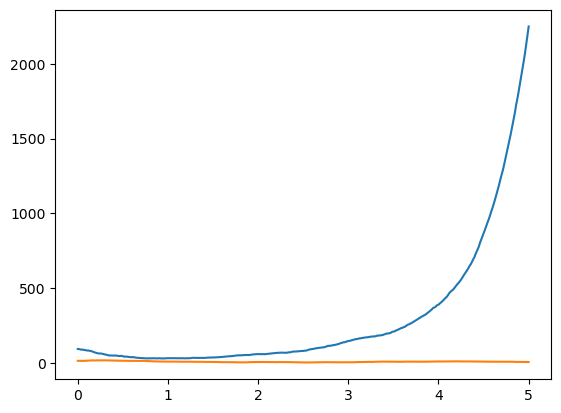

In [32]:
plt.plot(t_ssa, x_ssa)

## Tau-leaping

In [21]:
tau = 0.005  # Leap size

n_runs = 100
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_tau = tau_leaping(drift, S_matrix, c, X0, T, tau)
    runs.append(X)
    
print('Number of steps: ', len(X))

0.0 % simulations completed
[0.94  1.41  0.141 0.111]
[0.93   1.395  0.1395 0.111 ]
[0.93   1.395  0.1395 0.111 ]
[0.93   1.395  0.1395 0.111 ]
[0.91   1.365  0.1365 0.111 ]
[0.9   1.35  0.135 0.111]
[0.91   1.456  0.1456 0.1184]
[0.91   1.456  0.1456 0.1184]
[0.91   1.456  0.1456 0.1184]
[0.91   1.456  0.1456 0.1184]
[0.92   1.472  0.1472 0.1184]
[0.91   1.456  0.1456 0.1184]
[0.91   1.456  0.1456 0.1184]
[0.91   1.456  0.1456 0.1184]
[0.9    1.53   0.153  0.1258]
[0.9    1.53   0.153  0.1258]
[0.9    1.53   0.153  0.1258]
[0.92   1.564  0.1564 0.1258]
[0.93   1.581  0.1581 0.1258]
[0.95   1.615  0.1615 0.1258]
[0.94   1.598  0.1598 0.1258]
[0.94   1.598  0.1598 0.1258]
[0.94   1.598  0.1598 0.1258]
[0.94   1.598  0.1598 0.1258]
[0.93   1.581  0.1581 0.1258]
[0.93   1.581  0.1581 0.1258]
[0.91   1.638  0.1638 0.1332]
[0.91   1.638  0.1638 0.1332]
[0.89   1.602  0.1602 0.1332]
[0.89   1.602  0.1602 0.1332]
[0.88   1.584  0.1584 0.1332]
[0.87   1.566  0.1566 0.1332]
[0.87   1.566  0.156

In [22]:
std_tau = np.std(runs, axis=0)[:,0]

In [7]:
np.mean(runs, axis=0)[:,0]**2 + np.var(runs, axis=0)[:,0]

array([4.  , 3.98, 4.19, 4.22, 4.41, 4.11, 4.03, 4.1 , 4.03, 3.91, 3.71,
       3.32, 3.1 , 3.14, 3.13, 3.13, 3.14, 3.02, 3.1 , 3.14, 3.07, 2.88,
       2.94, 2.84, 2.9 , 3.03, 2.97, 2.96, 2.98, 2.77, 2.69, 2.87, 3.  ,
       3.11, 3.05, 2.76, 2.62, 2.4 , 2.41, 2.73, 2.62, 2.53, 2.53, 2.6 ,
       2.73, 2.87, 2.75, 2.84, 2.86, 2.8 , 2.88, 2.55, 2.5 , 2.49, 2.52,
       2.32, 2.33, 2.24, 2.22, 2.19, 2.12, 2.03, 2.03, 2.09, 2.25, 2.3 ,
       2.13, 2.13, 2.19, 2.19, 2.21, 2.23, 2.31, 2.34, 2.32, 2.36, 2.42,
       2.37, 2.57, 2.35, 2.3 , 2.12, 2.17, 2.2 , 2.17, 2.18, 2.25, 2.22,
       2.26, 2.2 , 2.14, 1.97, 1.98, 2.  , 1.84, 1.79, 1.79, 1.8 , 1.75,
       1.7 , 1.69, 1.61, 1.61, 1.53, 1.57, 1.49, 1.5 , 1.63, 1.74, 1.76,
       1.89, 1.81, 1.79, 1.71, 1.73, 1.74, 1.79, 1.9 , 1.69, 1.6 , 1.65,
       1.58, 1.57, 1.55, 1.57, 1.59, 1.6 , 1.75, 1.75, 1.85, 1.78, 1.69,
       1.75, 1.78, 1.94, 1.94, 1.95, 2.03, 2.  , 2.05, 2.05, 2.12, 2.03,
       1.95, 1.89, 1.94, 2.  , 2.06, 1.91, 1.78, 1.

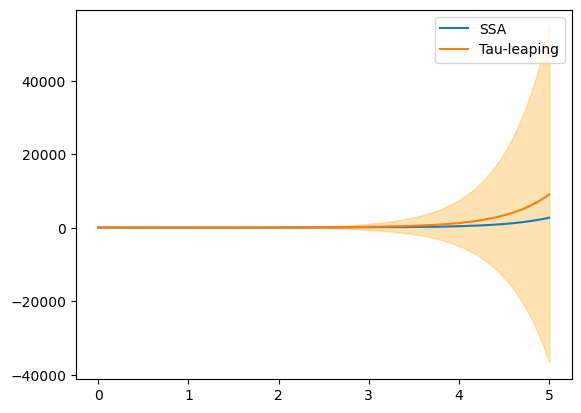

In [23]:
x_tau = np.mean(runs, axis=0)

plt.plot(t_ssa, x_ssa[:,0], label='SSA')
plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.fill_between(t_tau, x_tau[:,0]-std_tau, x_tau[:,0]+std_tau ,alpha=0.3, color='orange')
plt.legend()

## Mean-field

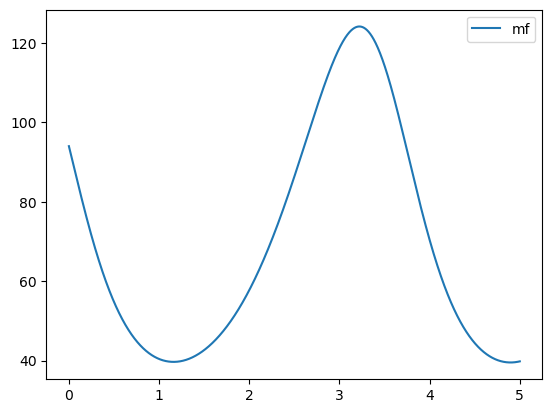

In [24]:

tmf = np.linspace(0,T, 5000)
Xmf = mean_field(drift,S_matrix,c,X0,tmf)

#plt.plot(t_ssa, x_ssa[:,0], label='SSA')
#plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.plot(tmf, Xmf[:,0], label='mf')
plt.legend()


## SOGA 

In [11]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

compiledFile=compile2SOGA('../programs/SOGA/SSA/Homodimerization.soga')
cfg = produce_cfg(compiledFile)
start = time()
output_dist = start_SOGA(cfg)
end = time()

print('Computed in {}s'.format(np.round(end-start,3)))

ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
It. [None]
rate1 0.0
rate2 0.0
rate3 0.0
rate4 0.0
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runti

/Users/rominadoz/Desktop/Home/SOGA4SSA/src/libSOGAupdate.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = 1 - norm.cdf(-muprime/pois_sigma)
/Users/rominadoz/Desktop/Home/SOGA4SSA/src/libSOGAupdate.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = muprime*pois_it[k_val-1] + pois_sigma*norm.pdf(-muprime/pois_sigma)


[1.0] 0.02500000000000001 0.025000000000000005
----------------------


TypeError: object of type 'numpy.float64' has no len()

In [11]:
t = len(t_tau)

x1 = np.zeros(t)
x2 = np.zeros(t)
std1 = np.zeros(t)
std2 = np.zeros(t)

for i in range(t):
    idx1 = output_dist.var_list.index('X1[{}]'.format(i))
    idx2 = output_dist.var_list.index('X2[{}]'.format(i))
    x1[i] = output_dist.gm.mean()[idx1]
    std1[i] = np.sqrt(output_dist.gm.cov()[idx1,idx1])
    x2[i] = output_dist.gm.mean()[idx2]
    std2[i] = np.sqrt(output_dist.gm.cov()[idx2,idx2])

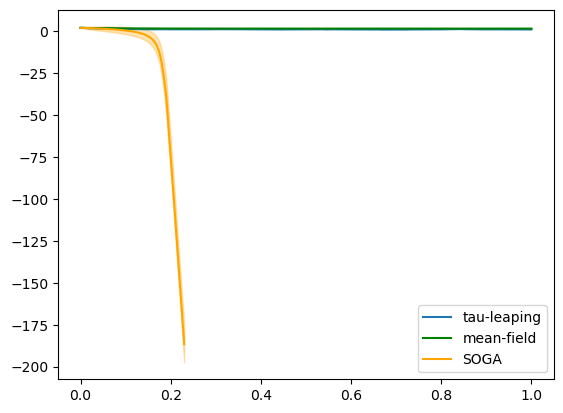

In [12]:
plt.plot(t_tau, x_tau[:,0], label='tau-leaping')
plt.plot(tmf, Xmf[:,0], label='mean-field', color='green')
plt.plot(t_tau, x1, label='SOGA', color='orange')
plt.fill_between(t_tau, x1-std1, x1+std1 ,alpha=0.3, color='orange')
plt.legend()

In [11]:
pois_mu = 325.4938460168556 
pois_sigma = 2199.1139286691114 
supp = 10

poisson_var(pois_mu, pois_sigma, supp, 'mom1')

([1.0], [nan], [nan])

In [23]:
std_tau

array([0.        , 0.40926764, 0.44676616, 0.57758116, 0.6636264 ,
       0.73484692, 0.77614432, 0.79113842, 0.79617837, 0.86827415,
       0.93680307, 0.94503968, 0.95205042, 0.95262794, 1.00419122,
       1.05337553, 1.05337553, 1.07870292, 1.09343495, 1.08531102,
       1.10140819, 1.11821286, 1.09886305, 1.09745159, 1.10503394,
       1.1017713 , 1.06414285, 1.05692952, 1.10503394, 1.13714555,
       1.14799826, 1.12334322, 1.08830143, 1.04589674, 1.0219589 ,
       1.03319892, 0.98873657, 0.97339612, 0.96041658, 0.95477746,
       0.9591663 , 0.94926287, 1.00019998, 0.9593748 , 0.93696318,
       0.90658701, 0.9       , 0.87057452, 0.86133617, 0.84113019,
       0.8357033 , 0.8842511 , 0.92195445, 0.9283857 , 0.9313968 ,
       0.90465463, 0.94968416, 0.98645831, 0.97652445, 0.98488578,
       0.96015624, 0.89727365, 0.89241246, 0.89241246, 0.81240384,
       0.85293611, 0.8842511 , 0.94106323, 0.91301698, 0.89949986,
       0.91098847, 0.89442719, 0.88876319, 0.9162969 , 0.92146

In [24]:
std1

array([ 0.        ,  0.36055513,  0.51599724,  0.64382892,  0.75831839,
        0.86445664,  0.96467658,  1.06039367,  1.1525382 ,  1.2417851 ,
        1.32866857,  1.41364569,  1.49713501,  1.57954218,  1.6612787 ,
        1.74277733,  1.82450623,  1.90698357,  1.99079392,  2.07660792,
        2.16520704,  2.25751573,  2.35464431,  2.45794775,  2.56910778,
        2.69025073,  2.82412116,  2.97434519,  3.14584399,  3.34550883,
        3.58335484,  3.87460243,  4.24367857,  4.73245576,  5.41777399,
        6.43824142,  7.91476261,  9.53865238, 10.98805817, 10.9760386 ,
       10.97027323, 10.967259  , 10.96067326, 10.95404975, 10.94708907,
       10.93964255, 10.9316355 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      